# Zarr examination

This notebook highlights the layout of the extracted features produced by the pipeline in [../reproducibility/](https://github.com/CraigMyles/SurGen-Dataset/tree/main/reproducibility). Understanding this layout will enable easier utilisation of these features and the pipeline for outside downstream usage.

Patch-level UNI feature embeddings from the SurGen dataset are available to download from [https://zenodo.org/records/14047723](https://zenodo.org/records/14047723). These features can be generated yourself using the reproduciblity pipeline in the SurGen-Dataset github repository.

The following will provide an overview of how these are laid out and how they can be interacted with.

In [1]:
import zarr

# Path to your Zarr file
zarr_file_path = '/data/SR386_40X_HE_T1.zarr'

zarr_store = zarr.open(zarr_file_path, mode='r')

# Access the data
features = zarr_store['features']
coords = zarr_store['coords']

print("\n--- Zarr File Details ---")
print(f"Path: {zarr_file_path}")

print("\n--- Features Dataset ---")
print(f"Number of patches: {features.shape[0]}")
print(f"Shape: {features.shape}, Data type: {features.dtype}")
print(f"Chunks: {features.chunks}, Compressor: {features.compressor}")

print(f"\nSample embedding: {features[1]}")

print("\n--- Coordinates Dataset ---")
print(f"Shape: {coords.shape}, Data type: {coords.dtype}")
print(f"Chunks: {coords.chunks}, Compressor: {coords.compressor}")

print("\n--- First Few Patch Coordinates ---")
print(coords[:5])


--- Zarr File Details ---
Path: /data/SR386_40X_HE_T1.zarr

--- Features Dataset ---
Number of patches: 8249
Shape: (8249, 1024), Data type: float32
Chunks: (512, 1024), Compressor: Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)

Sample embedding: [-0.7458191   0.82273597 -0.5329656  ...  0.8853546   0.1113821
 -0.9061703 ]

--- Coordinates Dataset ---
Shape: (8249, 2), Data type: int64
Chunks: (512, 2), Compressor: Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)

--- First Few Patch Coordinates ---
[[ 76480 165824]
 [ 78494 165824]
 [255104 109120]
 [255104 111134]
 [255104 113148]]


While not particularly useful in practice, we can plot the coordinates on a graph to visualise the WSI's shape:

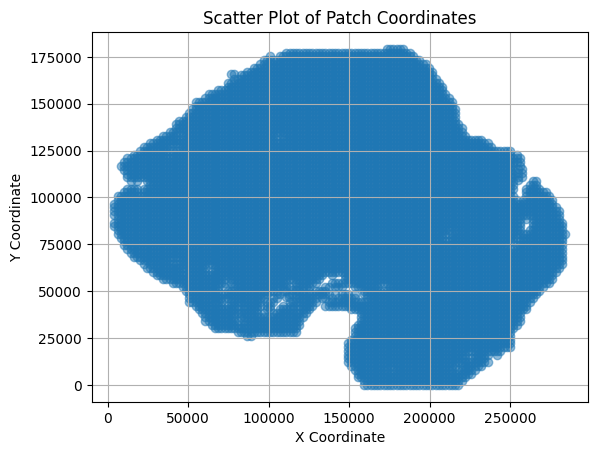

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of the first 100 patch coordinates
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.5)
plt.title("Scatter Plot of Patch Coordinates")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


It's worthwhile noting that these features were extracted from the WSI with non-overlapping tiles of size 224x224 pixels @ 1.0MPP resolution.